In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new mode
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [11]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x157565900>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [12]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x16935dcc0>,
 'id': 1,
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
max_measure_date_str = session.query(func.max(Measurement.date)).scalar()
max_measure_date_str
#('2017-08-23',)

'2017-08-23'

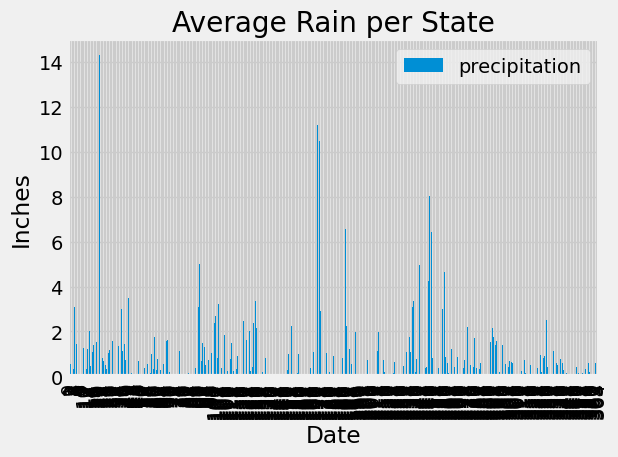

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
max_measure_date = datetime.strptime(max_measure_date_str, '%Y-%m-%d')
min_measure_date = max_measure_date - relativedelta(months=12)
# Perform a query to retrieve the data and precipitation scores
#measurements = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(min_measure_date, max_measure_date)).statement
measurements_query = (
        session.query(
            Measurement.date,
            func.sum(Measurement.prcp).label('precipitation')
        )
        .filter(Measurement.date.between(min_measure_date, max_measure_date))
        .group_by(Measurement.date)
        .statement
    )
# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_names = inspector.get_columns('measurement')
measurements_df = pd.read_sql(measurements_query, engine, columns=column_names)

# Sort the dataframe by date
measurements_df = measurements_df.sort_values(by=['date'])
measurements_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
measurements_df.plot(kind="bar")

plt.title("Average Rain per State")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()